In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [6]:
folder_path = r"C:\Users\Kaleb\OneDrive\Documents\AC\data\data"

In [9]:
benin_data = pd.read_csv(f'{folder_path}\\benin_clean.csv')
sierra_leone_data = pd.read_csv(f'{folder_path}\\sierraleone_clean.csv')
togo_data = pd.read_csv(f'{folder_path}\\togo_clean.csv')

In [10]:
print(benin_data.head())
print(sierra_leone_data.head())
print(togo_data.head())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2  
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2  
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2  
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3  
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3  
   GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  WSstdev   WD  WDstdev  \
0 -0.7 -0.1 -0.8   0.0   0.0  2

In [11]:
benin_data['Country'] = 'Benin'
sierra_leone_data['Country'] = 'Sierra Leone'
togo_data['Country'] = 'Togo'

In [12]:
all_data = pd.concat([benin_data, sierra_leone_data, togo_data], ignore_index=True)


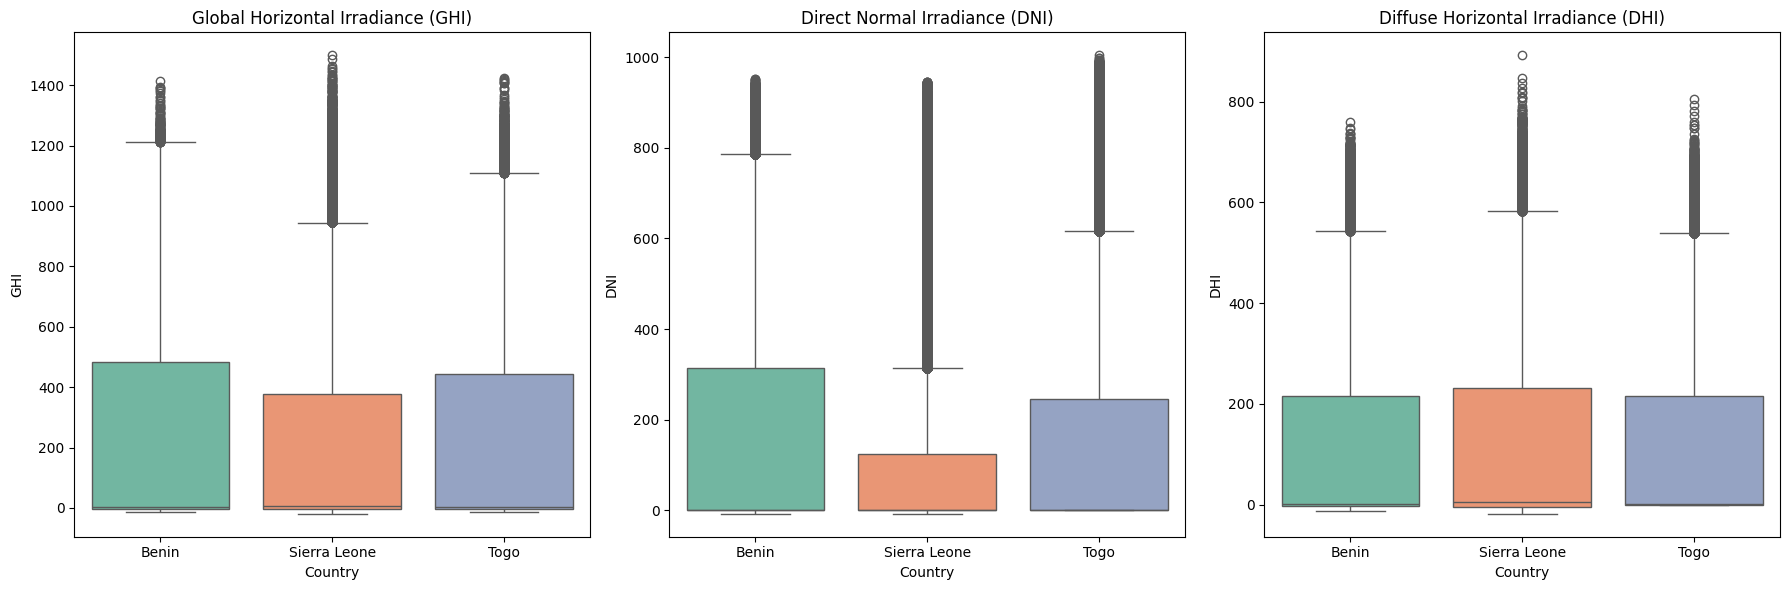

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(ax=axes[0], x='Country', y='GHI', data=all_data, palette='Set2')
axes[0].set_title('Global Horizontal Irradiance (GHI)')

sns.boxplot(ax=axes[1], x='Country', y='DNI', data=all_data, palette='Set2')
axes[1].set_title('Direct Normal Irradiance (DNI)')

sns.boxplot(ax=axes[2], x='Country', y='DHI', data=all_data, palette='Set2')
axes[2].set_title('Diffuse Horizontal Irradiance (DHI)')

plt.tight_layout()
plt.show()

In [21]:
summary_stats = all_data.groupby('Country').agg(
    GHI_mean=('GHI', 'mean'),
    GHI_median=('GHI', 'median'),
    GHI_std=('GHI', 'std'),
    DNI_mean=('DNI', 'mean'),
    DNI_median=('DNI', 'median'),
    DNI_std=('DNI', 'std'),
    DHI_mean=('DHI', 'mean'),
    DHI_median=('DHI', 'median'),
    DHI_std=('DHI', 'std')
).reset_index()

print("\nSummary Table:")
print(summary_stats.round(2))  # Round for better readability


Summary Table:
        Country  GHI_mean  GHI_median  GHI_std  DNI_mean  DNI_median  DNI_std  \
0         Benin    240.56         1.8   331.13    167.19        -0.1   261.71   
1  Sierra Leone    208.24         5.7   300.88    119.97         0.0   221.03   
2          Togo    230.56         2.1   322.53    151.26         0.0   250.96   

   DHI_mean  DHI_median  DHI_std  
0    115.36         1.6   158.69  
1    117.30         5.2   160.05  
2    116.44         2.5   156.52  


In [23]:
ghi_benin = benin_data['GHI']
ghi_sierra = sierra_leone_data['GHI']
ghi_togo = togo_data['GHI']

f_stat, p_value = stats.f_oneway(ghi_benin, ghi_sierra, ghi_togo)

print("\nOne-way ANOVA Test on GHI:")
print(f"F-statistic = {f_stat:.4f}, P-value = {p_value:.4f}")
if p_value < 0.05:
    print(" The difference in GHI across countries is statistically significant (p < 0.05).")
else:
    print(" No statistically significant difference in GHI across countries (p >= 0.05).")


One-way ANOVA Test on GHI:
F-statistic = 1391.3983, P-value = 0.0000
 The difference in GHI across countries is statistically significant (p < 0.05).
